In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib, argparse
import scipy

In [2]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
width=0.75
color='black'
fontsize=28
ticksize=22
figsize=(10,10)

# Fergus's work

In [3]:
phase = True
fmin=40.
fmax=168.
m1=35.
m2=30.
Tfrac=100.
beta=0.
sig=0.
nx = 6
nintx = int(np.ceil(np.log2((fmax-fmin))))

xmax = np.power(2,nintx) - np.power(2,nintx-nx)
xmin = 0.

def m_geo(m):
    return (4.926e-6)*m

df = (fmax-fmin)/(2**nx)
T = 1./df

####### Physical system parameters ###################
m1 = m_geo(m1)
m2 = m_geo(m2)
tc = T + (T/Tfrac)
DT = tc%T
Mt = m1 + m2
nu = (m1*m2)/Mt
eta = nu/Mt
Mc = Mt*eta**(3./5)

def x_trans(x):
    x = x/xmax
    x = x*(fmax-fmin-df)
    x = x + fmin
    return x

xs = np.linspace(xmin,xmax,2**(nx))
xsT = x_trans(xs)

def f_x(x, eps1=1, eps2=1, factor=1):
    x = x_trans(x)
    out = ((eps1*(3./128))*((np.pi*Mc*x)**(-5./3))*( 1.+ (20./9)*((743./336)+(11./4)*eta)*(np.pi*Mt*x)**(2./3) -4.*(4.*np.pi - beta)*(np.pi*Mt*x) + 10.*eps2*((3058673./1016064) + (eta*5429./1008) + (617*(eta**2)/144) - sig)*(np.pi*Mt*x)**(4./3)) + 2.*np.pi*x*DT)/(2.*np.pi*factor)
    return out

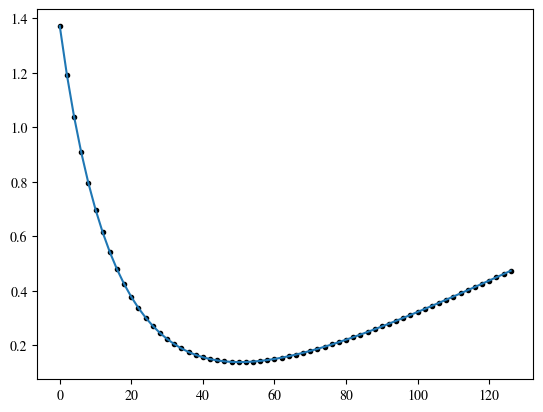

In [4]:
out_phase = f_x(xs)
plt.plot(xs,out_phase)
plt.scatter(xs,out_phase,color='k',marker='.')

# Phase

## Comparing IMR Inspiral to Fergus's work

This uses only the first 4 terms in the PN expansion, hence is not completely suitable for full IMR waveforms

In [5]:
from numpy import pi, log
f = xsT
tc = 0.005 #0 #Time of Coalescence
p = -0.76 #-55 #Phase shift
mc = 65.0*4.925490947641266978197229498498379006e-6 #Total Mass in seconds
Mf = mc*f
phiins = 2*pi*f*tc - p + (0.192233276998395*(Mf)**0.666666666666667 - 2.19688783134229*(Mf)**1.0\
                          + 2.96024568849217*(Mf)**1.33333333333333\
                          + 0.0139119547125656)/(Mf)**1.66666666666667 - pi/4
phiins = (phiins)/(2*pi)

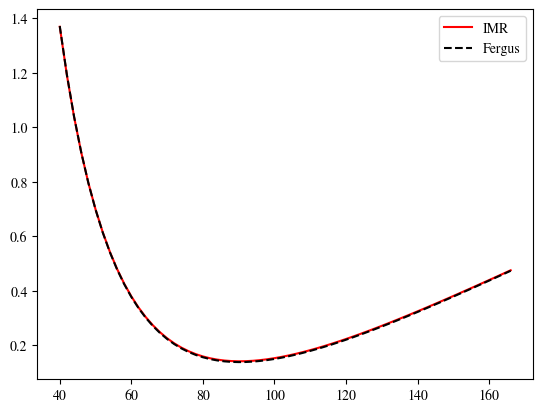

In [6]:
plt.plot(xsT,phiins,color='r',label='IMR')
plt.plot(xsT,out_phase,color='k',ls='--', label='Fergus')
#plt.plot(f,out-phiins,label='Difference')
plt.legend()
plt.show()

## Defining Functions

In [7]:
from numpy import pi, log, arctan, exp
fRD = 0.08803560530535628 
fDM = 0.013587622848993007
mc = 65.0*4.925490947641266978197229498498379006e-6
lim1 = 0.018/mc
lim2 = fRD/2 /mc
f = np.linspace(0.1,400.0,20000)
M = mc*f

In [8]:
def phiins_align(m,f): #m = total mass, f = frequency array
    M = m*f
    temp = (0.192233276998395*M**0.666666666666667 - 2.19688783134229*M**1.0 + 2.96024568849217*M**1.33333333333333 + M**1.66666666666667*(14.5236327040957*log(M) + 13.7382345406982 + 14.5236327040957*log(pi)) + M**2.0*(-14.9248887589603*log(M) - 151.602171055319 - 14.9248887589603*log(pi)) + 227.418872661984*M**2.33333333333333 - 291.846189618398*M**2.66666666666667 - 2730.3817082861*M**3.0 + 3143.98200779746*M**3.33333333333333 + 9618.72578330961*M**3.66666666666667 + 0.0139119547125656)/M**1.66666666666667 - 1318.57198956936
    return temp

def phiint_align(m,f):
    M = m*f
    temp = 345.028196850348*M - 9.63599141522925*log(M) - 1416.4530276395 + 1.29058693573989e-5/M**3
    return temp

def phimrd_align(m,f):
    M = m*f
    temp = -76.9234895092469*M**0.75 + M*(68.6084707764252/fRD**0.25 + 0.94033600310695 - 19.2719828304585/fRD + 0.842931455864094/fRD**2 - 0.000619481729155146/fRD**4 - 1.06458720296323/(fDM*(1.0 + 0.243181811406409*fRD**2/fDM**2))) + 344.087860847241*M + 45.7389805176168*fRD**0.75 - fRD*(68.6084707764252/fRD**0.25 + 0.94033600310695 - 19.2719828304585/fRD + 0.842931455864094/fRD**2 - 0.000619481729155146/fRD**4 - 1.06458720296323/(fDM*(1.0 + 0.243181811406409*fRD**2/fDM**2)))/2 + 0.470168001553475*fRD - 9.63599141522925*log(fRD/2) + 1.06458720296323*arctan(0.49313467877083*fRD/fDM) + 1.06458720296323*arctan((M - 0.99313467877083*fRD)/fDM) - 1416.4530276395 - 0.421465727932047/fRD + 0.000103246954859191/fRD**3 + 0.210732863966024/M
    return temp

In [9]:
phi_net = np.piecewise(f,[f<=lim1,f<=lim2,f>lim2],[lambda f: phiins_align(mc,f), lambda f: phiint_align(mc,f), lambda f: phimrd_align(mc,f)])
out_fin = out_phase
tc = 0.00093 #Time of Coalescence
p = -1373 #Phase shift
#These values DIFFER from the previously set values because this expression below includes all PN terms that the previous phase didn't
phi_net_plot = (2*np.pi*f*tc - np.pi/4 - p + phi_net)/(2*np.pi)

(0.0, 3.0)

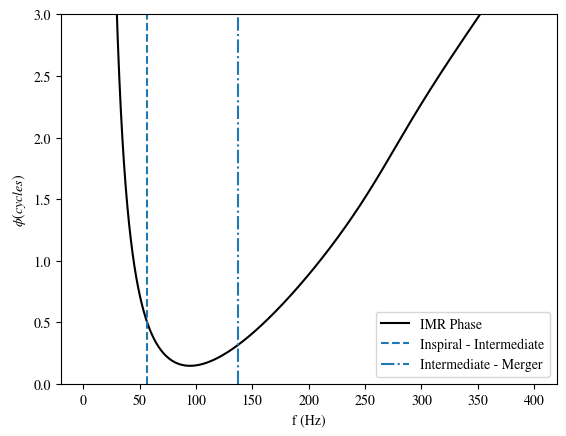

In [10]:
plt.plot(f,phi_net_plot,label='IMR Phase',color='k')
#plt.plot(f,(phiins_align(mc,f)-p)/(2*np.pi),label='Inspiral')
#plt.plot(f,(phiint_align(mc,f)-p)/(2*np.pi),label='Intermediate')
#plt.plot(f,(phimrd_align(mc,f)-p)/(2*np.pi),label='Merger-Ringdown')
#plt.plot(xsT,out_fin,label='Fergus (Only Inspiral)',color='r',linestyle='--')
plt.axvline(lim1,label='Inspiral - Intermediate',linestyle='--')
plt.axvline(lim2,label='Intermediate - Merger',linestyle='-.')
plt.legend()
plt.ylabel("$\phi (cycles)$")
plt.xlabel("f (Hz)")
plt.ylim(0,3)
#plt.xlim(30,lim1)
#plt.savefig("phase2.png")

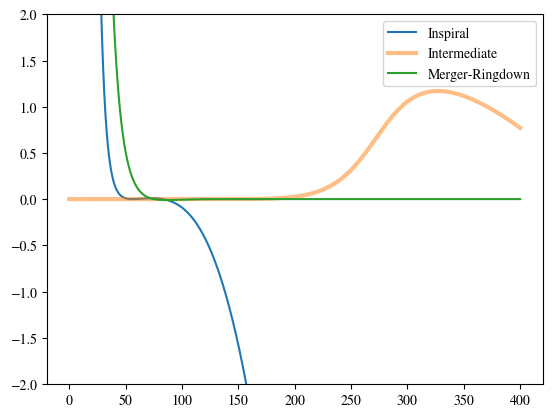

In [11]:
#This is just to check whether the piecewise function has been correctly implemented
diff1 = phi_net - phiins_align(mc,f)
diff2 = phi_net - phiint_align(mc,f)
diff3 = phi_net - phimrd_align(mc,f)
plt.plot(f,diff1,label='Inspiral')
plt.plot(f,diff2,label='Intermediate',lw=3,alpha=0.5)
plt.plot(f,diff3,label='Merger-Ringdown')
plt.ylim(-2,2)
plt.legend()

## Choosing bins - The results from this method are not used for match calculation

/tmp/ipykernel_1068891/816839100.py:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  der2 = scipy.misc.derivative(ph_fun,x0=fr,dx=1*df,n=2)


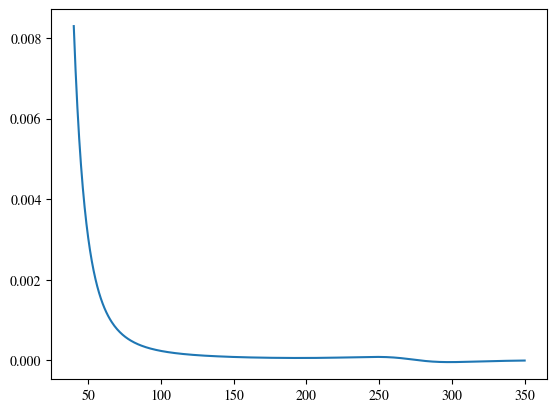

In [12]:
ph_fun = scipy.interpolate.interp1d(f,phi_net_plot) 
fmin = 40
fmax = 350
N = 500
fr = np.linspace(fmin,fmax,N)
df = (fmax-fmin)/N
der2 = scipy.misc.derivative(ph_fun,x0=fr,dx=1*df,n=2)
phases = ph_fun(fr)
plt.plot(fr,der2)
#plt.xlim(40,70)

In [13]:
k = 0.019 #0.1 (16 bins)
bins = np.array([])
bins = np.append(bins,fmin)
i = fmin
while i<fmax:
    der2 = scipy.misc.derivative(ph_fun,x0=i,dx=3*df,n=2)
    delta = (k*abs(1/der2))**(1/2)
    fn = i + delta
    bins = np.append(bins,fn)
    i = fn

/tmp/ipykernel_1068891/3790985620.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  der2 = scipy.misc.derivative(ph_fun,x0=i,dx=3*df,n=2)


In [14]:
print(len(bins))
bins[-1]=fmax #This is done because the final bin exceeds the maximum frequency allowed

32


Text(0, 0.5, '$\\phi (cycles)$')

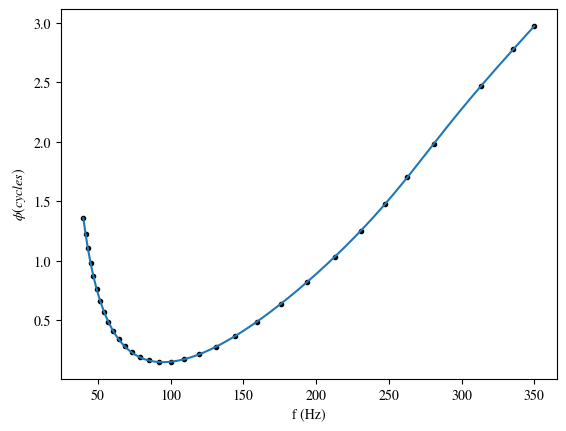

In [15]:
plt.plot(fr,phases)
plt.scatter(bins,ph_fun(bins),color='k',marker='.')
plt.xlabel("f (Hz)")
plt.ylabel("$\phi (cycles)$")
#plt.savefig("phase_points.png")

In [16]:
app_ph = scipy.interpolate.InterpolatedUnivariateSpline(bins, ph_fun(bins), k=1)

Text(0.5, 1.0, 'Difference between the spline and the IMR phase')

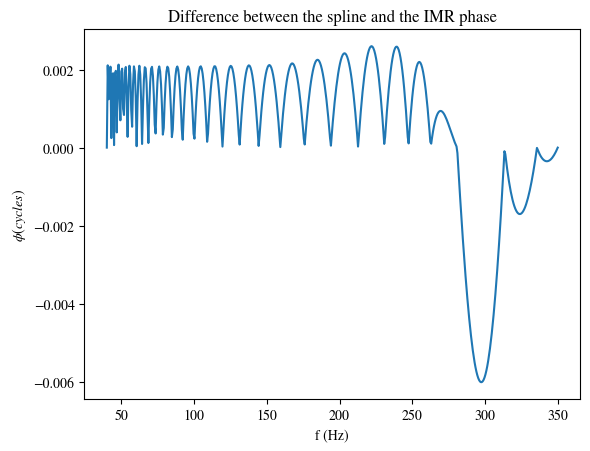

In [17]:
plt.xlabel("f (Hz)")
plt.ylabel("$\phi (cycles)$")
plt.plot(fr, app_ph(fr) - phases)
plt.title('Difference between the spline and the IMR phase')
#plt.savefig("phase_errors.png")

## Alternate Method - Used in match calculation

In [18]:
ph_fun_alt = scipy.interpolate.InterpolatedUnivariateSpline(f,phi_net_plot,k=5) 
fmin = 40
fmax = 350
N = 500
fr = np.linspace(fmin,fmax,N)
df = (fmax-fmin)/N
der2_alt = ph_fun_alt.derivative(n=2)
phases = ph_fun_alt(fr)
der = der2_alt(fr)
#plt.plot(fr,der)
#plt.plot(fr,der2)
#plt.xlim(40,70)

In [19]:
k = 0.018 #0.1 (16 bins)
bins = np.array([])
bins = np.append(bins,fmin)
i = fmin
while i<fmax:
    der2 = der2_alt(i)
    delta = (k*abs(1/der2))**(1/2)
    fn = i + delta
    bins = np.append(bins,fn)
    i = fn

We need 33 points for 32 bins

In [20]:
print(len(bins))
bins[-1] = fmax

33


In [21]:
app_ph = scipy.interpolate.InterpolatedUnivariateSpline(bins, ph_fun_alt(bins), k=1)

Text(0.5, 1.0, 'Difference between the spline and the IMR phase')

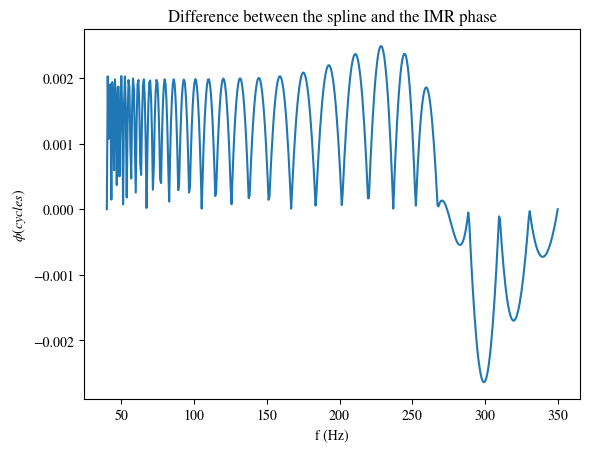

In [22]:
plt.xlabel("f (Hz)")
plt.ylabel("$\phi (cycles)$")
plt.plot(fr, app_ph(fr) - phases)
plt.title('Difference between the spline and the IMR phase')

### Save data

In [23]:
#RUN THIS TO SAVE DATA LOCALLY

#np.savetxt('Phase_bins.txt',bins)
#np.savetxt('Phase_bins_phases.txt',ph_fun(bins))

# Amplitude

## Defining Functions

In [24]:
def ampins(m,f):
    M = m*f
    temp = 1.0*(-1.65346016027308*M**0.666666666666667 - 20.9165547229562*M**1.33333333333333 - 49.7411328692393*M**2.0 + 3732.32311535403*M**2.33333333333333 - 38985.411777689*M**2.66666666666667 + 97150.3925991756*M**3.0 + 1)/M**1.16666666666667
    return temp

def ampint(m,f):
    M = m*f
    temp = 1.0*(-24857.8876111804*M**4 - 555.774331218285*M**3 + 527.285126438352*M**2 - 24.8870827483312*M + 1.07021302528877)/M**1.16666666666667
    return temp

def ampmrd(m,f):
    M = m*f
    temp = 0.0223314133093818*fDM*exp(-0.644487671942311*(M - fRD)/fDM)/(M**1.16666666666667*(1.74724436683344*fDM**2 + (M - fRD)**2))
    return temp

In [25]:
lim1a =  0.014/mc #Inspiral - Intermediate boundary
lim2a =  0.07803912805383108/mc #Intermediate - Merger boundary
amp0 = 0.33733861901045753

In [26]:
amp_net = amp0*np.piecewise(f,[f<=lim1a,f<=lim2a,f>lim2a],[lambda f: ampins(mc,f), lambda f: ampint(mc,f), lambda f: ampmrd(mc,f)])

Text(0, 0.5, 'A')

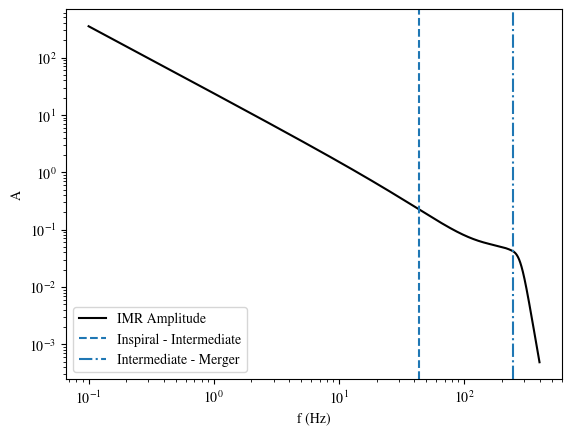

In [27]:
plt.loglog(f,amp_net/(45/0.25),label='IMR Amplitude',color='k')
plt.axvline(lim1a,label='Inspiral - Intermediate',linestyle='--')
plt.axvline(lim2a,label='Intermediate - Merger',linestyle='-.')
plt.legend()
plt.xlabel('f (Hz)')
plt.ylabel('A')
#plt.xlim(40,200)
#plt.ylim(0,0.5)
#plt.savefig("amp2.png")

## Choosing bins - The results from this method are not used for match calculation

/tmp/ipykernel_1068891/1716672048.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  der2_am = scipy.misc.derivative(am_fun,x0=fr,dx=1*df,n=2,)


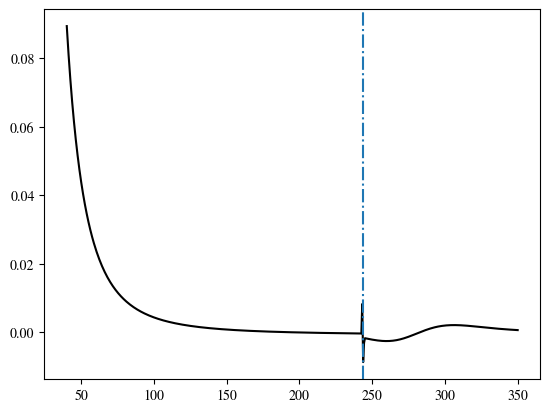

In [28]:
#The second derivative of the amplitude has a discontinuity at the Intermediate - Merger boundary.
am_fun = scipy.interpolate.interp1d(f,amp_net)
fmin = 40
fmax = 350
N = 500
fr = np.linspace(fmin,fmax,N)
df = (fmax-fmin)/N
der2_am = scipy.misc.derivative(am_fun,x0=fr,dx=1*df,n=2,)
amps = am_fun(fr)
plt.plot(fr,der2_am,color='k')
plt.axvline(lim2a,label='Intermediate - Merger',linestyle='-.')
#plt.plot(fr,der2)
#plt.xlim(40,70)

In [29]:
k = 0.2708
bins_amp = np.array([])
bins_amp = np.append(bins_amp,fmin)
i = fmin
while i<fmax:
    der2 = scipy.misc.derivative(am_fun,x0=i,dx=3*df,n=2)
    delta = (k*abs(1/der2))**(1/2)
    fn = i + delta
    bins_amp = np.append(bins_amp,fn)
    i = fn

/tmp/ipykernel_1068891/473680093.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  der2 = scipy.misc.derivative(am_fun,x0=i,dx=3*df,n=2)


In [30]:
# I had to manually set some of the bins due to the discontinuity in the derivative, which isn't ideal. I am trying to fix this
print(len(bins_amp))
bins_amp[24] = 210.0
bins_amp[28] = 300.0
bins_amp[29] = 319.95
bins_amp[30] = 332.495
bins_amp[31] = 347.61
print(bins_amp)

33
[ 40.          41.73849342  43.59995869  45.59671212  47.74271011
  50.05382976  52.54821367  55.24668981  58.17329839  61.3559502
  64.82726525  68.62565895  72.79677619  77.39540834  82.4881521
  88.15718576  94.50584466 101.66724465 109.81838563 119.20498485
 130.18959492 143.35815461 159.80847488 182.26074316 210.
 257.8009131  268.10609977 279.24261581 300.         319.95
 332.495      347.61       353.07253514]


Text(0, 0.5, '$A$')

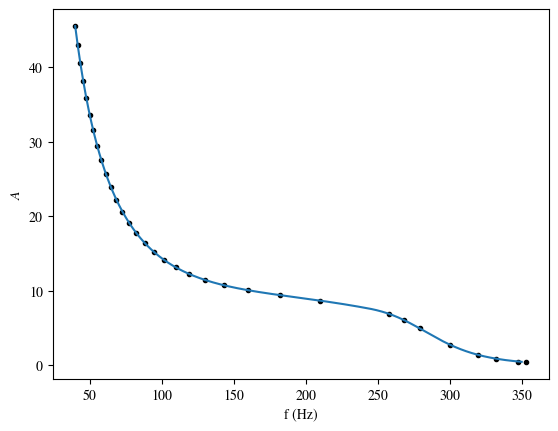

In [31]:
plt.plot(fr,amps)
plt.scatter(bins_amp,am_fun(bins_amp),color='k',marker='.')
plt.xlabel("f (Hz)")
plt.ylabel("$A$")
#plt.savefig("Amplitude_points.png")

In [32]:
app_amp = scipy.interpolate.InterpolatedUnivariateSpline(bins_amp, am_fun(bins_amp), k=1)

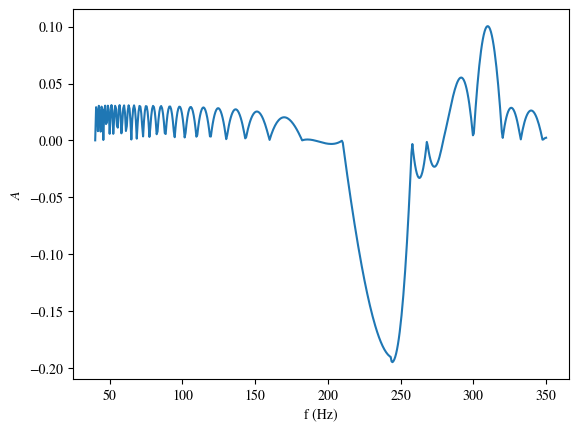

In [33]:
plt.xlabel("f (Hz)")
plt.ylabel("$A$")
plt.plot(fr, app_amp(fr) - amps)
#plt.savefig("amp_errors.png")

## Alternate method - Used in match calculation

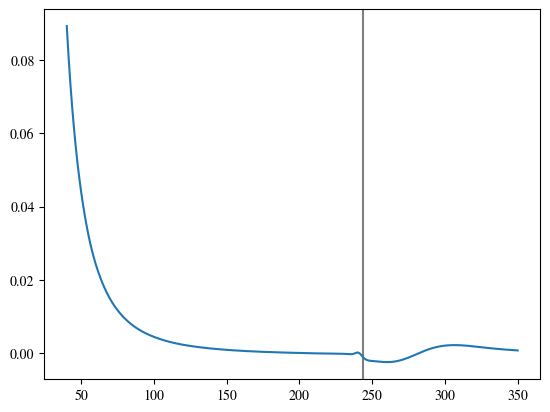

In [34]:
am_fun_alt = scipy.interpolate.UnivariateSpline(f,amp_net,k=5,s=0.003) 
fmin = 40
fmax = 350
N = 500
fr = np.linspace(fmin,fmax,N)
df = (fmax-fmin)/N
der2_alt = am_fun_alt.derivative(n=2)
amps = am_fun_alt(fr)
der = der2_alt(fr)
#plt.loglog(fr,amps)
#plt.loglog(f,amp_net)
#plt.xlim(fmin,fmax)
#plt.ylim(am_fun_alt(fmax)-0.1,am_fun_alt(fmin)+1)
plt.axvline(lim2a,color='k',alpha=0.5)
plt.plot(fr,der)
n = 0.1
#plt.ylim(-n/4,n)

In [35]:
k = 0.2705
bins_amp = np.array([])
bins_amp = np.append(bins_amp,fmin)
i = fmin
while i<fmax:
    der2 = der2_alt(i)
    delta = (k*abs(1/der2))**(1/2)
    fn = i + delta
    bins_amp = np.append(bins_amp,fn)
    i = fn

Again, we need 33 points for 32 bins

In [36]:
print(len(bins_amp))
bins_amp[-1] = fmax
bins_amp

33


array([ 40.        ,  41.73988252,  43.60341388,  45.60224411,
        47.750013  ,  50.06179758,  52.55504725,  55.25304329,
        58.18193854,  61.36855354,  64.84147921,  68.63900132,
        72.80994794,  77.40809591,  82.50040407,  88.17265962,
        94.52432261, 101.6845862 , 109.82595133, 119.21421437,
       130.20746394, 143.36827004, 159.80442514, 182.26246815,
       225.86535583, 259.07298897, 269.37356128, 280.82588991,
       309.22430385, 320.64917159, 333.27012602, 348.55588331,
       350.        ])

Text(0, 0.5, '$A$')

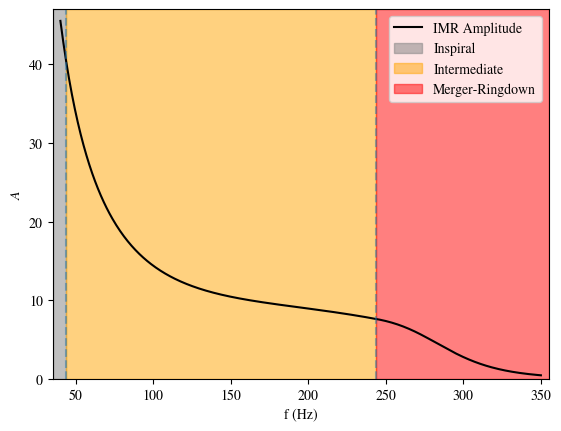

In [37]:
fig,ax = plt.subplots(1)
ax.plot(fr,amps,color='k',label='IMR Amplitude')
ax.axvline(lim1a,alpha=0.5,ls='--')
ax.axvline(lim2a,alpha=0.5,ls='--')
ax.fill([fmin-5,lim1a,lim1a,fmin-5],[0,0,47.0,47.0],color='gray',alpha=0.5,label='Inspiral')
ax.fill([lim1a,lim2a,lim2a,lim1a],[0,0,47.0,47.0],color='orange',alpha=0.5,label='Intermediate')
ax.fill([lim2a,fmax+5,fmax+5,lim2a],[0,0,47.0,47.0],color='red',alpha=0.5,label='Merger-Ringdown')
#plt.scatter(bins_amp,am_fun_alt(bins_amp),color='k',marker='.')
plt.xlim(fmin-5,fmax+5)
plt.ylim(0,47.0)
plt.legend()
plt.xlabel("f (Hz)")
plt.ylabel("$A$")
#plt.savefig('IMRAmp.png')

In [38]:
app_amp = scipy.interpolate.InterpolatedUnivariateSpline(bins_amp, am_fun_alt(bins_amp), k=1)

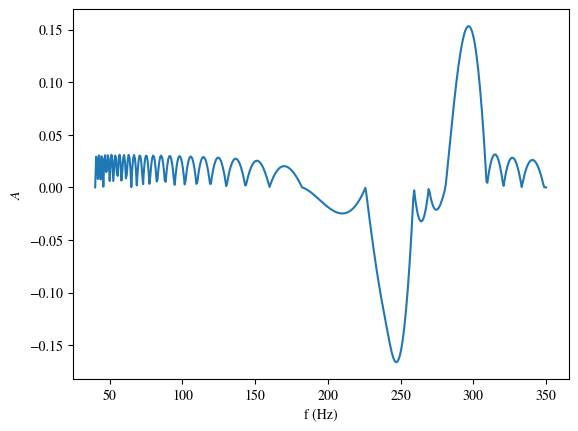

In [39]:
plt.xlabel("f (Hz)")
plt.ylabel("$A$")
plt.plot(fr, app_amp(fr) - amps)

### Save data

In [40]:
#RUN THIS TO SAVE DATA LOCALLY

#np.savetxt('Amp_bins.txt',bins_amp)
#np.savetxt('Amp_bins_amplitudes.txt',am_fun(bins_amp))

# Building and checking waveforms

In [41]:
ref_freq = 40

This is used to set the waveforms to zero below a particular reference frequency. 
This is necessary because the equations we use to calculate the match (as below) involve a fourier transform.

$\mathcal{O}(h_1,h_2) = \frac{4}{||h_1|| ||h_2||} \max_{t_0}\left|\mathcal{F}^{-1}\left[\frac{\tilde{h}_1^*(f) \tilde{h}_2(f)}{S_n(f)}\right](t_0)\right|$

In [42]:
def model(fre): #IMRPhenomD model for the waveform
    if fre < ref_freq:
        return 0
    temp = am_fun_alt(fre)*np.exp(1j*m*ph_fun_alt(fre))
    return temp
def approx(fre): #Linear Spline approximant for the waveform
    if fre < ref_freq:
        return 0
    temp = app_amp(fre)*np.exp(1j*m*ph_fun_alt(fre))
    return temp

In [43]:
f = np.linspace(0,350,2000)
m = 1
waveform_model = np.array([])
waveform_approx = np.array([])
for fi in f:
    tm = model(fi)#am_fun_alt(i)*complex(np.cos(m*ph_fun_alt(i)),np.sin(m*ph_fun_alt(i)))
    ta = approx(fi)#app_amp(i)*complex(np.cos(m*app_ph(i)),np.sin(m*app_ph(i)))
    waveform_model = np.append(waveform_model,tm)
    waveform_approx = np.append(waveform_approx,ta)

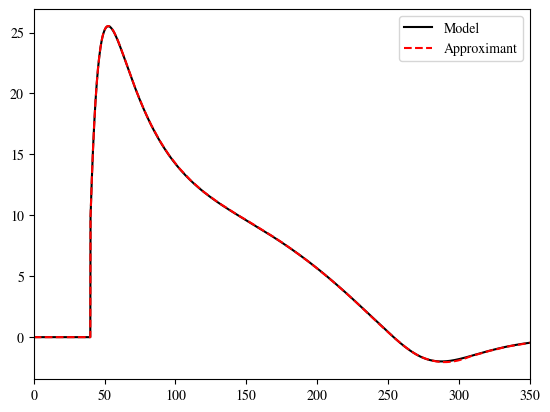

In [44]:
mod_plot = np.real(waveform_model)
app_plot = np.real(waveform_approx)
mod_iplot = np.imag(waveform_model)
app_iplot = np.imag(waveform_approx)
#plt.plot(f,mod_plot,color='k',label='Model')
#plt.plot(f,app_plot,color='r',label='Approximant',ls='--')
plt.plot(f,mod_plot,color='k',label='Model')
plt.plot(f,app_plot,color='r',label='Approximant',ls='--')
#plt.plot(f, mod_plot-app_plot)
#plt.plot(f, mod_iplot-app_iplot)
plt.xlim(0,350)
#plt.ylim(-5,27)
plt.legend()

# Mismatch Calculation

### PSD

In [45]:
#psd = np.genfromtxt("GWTC1_GW150914_PSDs.dat") #LIGO PSD
psd = np.genfromtxt("/work/pi_mpuerrer_uri_edu/Ashwin/Glasgow/Linear_Spline/aLIGODesign.txt") #Advanced LIGO PSD - This is what we are using
psd = np.transpose(psd)

In [46]:
freqs = psd[0]
psd_arr = psd[1]

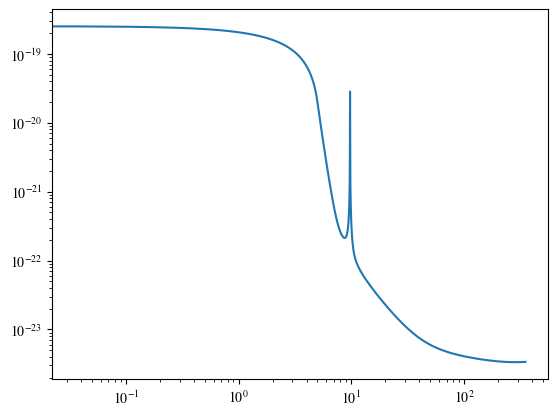

In [47]:
psdfun = scipy.interpolate.interp1d(freqs,psd_arr,fill_value='extrapolate') 
f = np.linspace(0, 350, 10000)
plt.loglog(f,psdfun(f))

### Match and Mismatch

In [48]:
h1 = np.array([approx(fi) for fi in f])
h2 = np.array([model(fi) for fi in f])
psd_arr = psdfun(f)

We also calculated the matches with a padded integrand to check if we got more accurate results. The results don't vary by much in the end.

In [49]:
integrand = h1*h2.conj()/psd_arr
h1_norm = np.abs(4*np.dot(h1.conj(), h1/psd_arr))
h2_norm = np.abs(4*np.dot(h2.conj(), h2/psd_arr))

p = 4*np.abs(np.fft.fft(integrand)) / np.sqrt(h1_norm*h2_norm)
integrand_padded = np.pad(integrand, 2*len(integrand))
p_zpad = 4*np.abs(np.fft.fft(integrand_padded)) / np.sqrt(h1_norm*h2_norm)

In [50]:
h1_norm, h2_norm

(np.float64(1.3542666178316054e+30), np.float64(1.3535749710103753e+30))

In [51]:
match, matchpad = np.max(p), np.max(p_zpad)
print(match, matchpad)

0.9999892498512766 0.9999892498512766


In [52]:
mismatch = (1 - match)*100
mismatchpad = (1 - matchpad)*100
print(mismatch,mismatchpad) #In Percentages

0.0010750148723426278 0.0010750148723426278


0


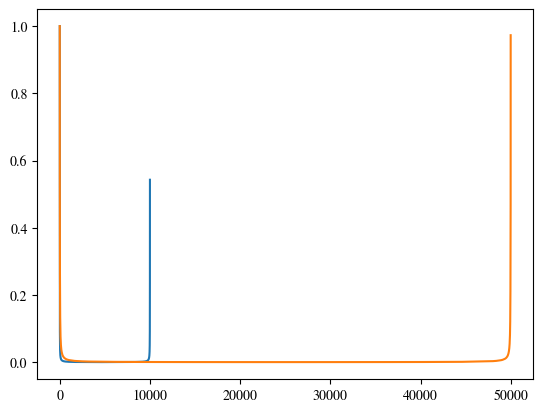

In [53]:
print(np.argmax(p_zpad))
plt.plot(p);
plt.plot(p_zpad);

This implies that the time shift that gives us the maximum match is 0.

# Calculating $\theta$ for the amplitudes
This makes use of Eqn (5). from Fergus' paper with a small modification. The probabilities are calculated  by integrating the linear spline approximant between the chosen frequencies. Alternatively, we can calculate the probabilities using the area of a trapezium. These probabilities are then added according to the limits in the equation. The notation in the following block has been chosen to match the notation used in the paper where possible. 

In [54]:
n = 5
m = np.array([0,1,2,3,4])
costhetamj = []

for mi in m:
    j = np.arange(0,((2**mi)),1)
    temp = np.array([])
    for ji in j:
        
        low = int(ji*(2**(n-mi)))
        high_num = int((ji+0.5)*(2**(n-mi)))
        high_den = int((ji+1)*(2**(n-mi)))
        
        area_num = [(1/2)*(bins_amp[i+1] - bins_amp[i])*(app_amp(bins_amp[i+1]) + app_amp(bins_amp[i])) for i in np.arange(low,high_num,1)]
        area_den = [(1/2)*(bins_amp[l+1] - bins_amp[l])*(app_amp(bins_amp[l+1]) + app_amp(bins_amp[l])) for l in np.arange(low,high_den,1)]
        
        cos2th = np.sum(area_num)/np.sum(area_den)
        costh = np.sqrt(cos2th)
        th = np.arccos(costh)
        
        dict = {"m":mi,"j":ji,"theta":th}
        temp = np.append(temp,dict)
    
    costhetamj = np.append(costhetamj,temp)

In [55]:
costhetamj

array([{'m': np.int64(0), 'j': np.int64(0), 'theta': np.float64(0.8672705049722368)},
       {'m': np.int64(1), 'j': np.int64(0), 'theta': np.float64(0.8184219828503949)},
       {'m': np.int64(1), 'j': np.int64(1), 'theta': np.float64(0.548723410676924)},
       {'m': np.int64(2), 'j': np.int64(0), 'theta': np.float64(0.7967029051520534)},
       {'m': np.int64(2), 'j': np.int64(1), 'theta': np.float64(0.8094819496580401)},
       {'m': np.int64(2), 'j': np.int64(2), 'theta': np.float64(0.9524786697248765)},
       {'m': np.int64(2), 'j': np.int64(3), 'theta': np.float64(0.29697812388878236)},
       {'m': np.int64(3), 'j': np.int64(0), 'theta': np.float64(0.790645952406786)},
       {'m': np.int64(3), 'j': np.int64(1), 'theta': np.float64(0.79186797556468)},
       {'m': np.int64(3), 'j': np.int64(2), 'theta': np.float64(0.794145441361693)},
       {'m': np.int64(3), 'j': np.int64(3), 'theta': np.float64(0.8014062905794326)},
       {'m': np.int64(3), 'j': np.int64(4), 'theta': np.fl

# Alternate Discretisation Schemes

In [56]:
#This is the function that calculates theta using the method from the previous section.
def thetas(f,amplitude_fun):
    t = np.array([])
    for i in range(0,len(f)-1):
        f_int = (f[i+1] + f[i])/2
        area_num = (1/2)*(f_int - f[i])*(amplitude_fun(f_int) + amplitude_fun(f[i]))
        area_den = (1/2)*(f[i+1] - f[i])*(amplitude_fun(f[i+1]) + amplitude_fun(f[i]))
        costheta2 = area_num/area_den
        costheta = np.sqrt(costheta2)
        theta = np.arccos(costheta)
        t = np.append(t,theta)
    return(t)

In [57]:
#This is a function that goes as f^(-7/6). I have used Fergus' code for this
def amplitude(f):
    amps = f**(-7./6)
    return amps

## Scheme 1: 

In [58]:
#f_start and f_end just make it easier for me to change the bounds to whichever segment I want to study
f_start = fmin
f_end = fmax # Set to study only the inspiral
f0 = np.array([f_start,f_end])
f1 = np.array([f_start, (f_start+f_end)/2, f_end])
f2 = np.array([f_start, (f1[0]+f1[1])/2, (f_start+f_end)/2, (f1[1]+f1[2])/2,f_end])
d1 = (f2[-2] - f_start)/6
f3 = np.array([f_start, f_start+d1, f_start+(2*d1), f_start+(3*d1), f_start+(4*d1), f_start+(5*d1), f2[-2], f_end])
d2 = (f2[-3] - f_start)/3
d3 = d2/4
d4 = (f2[-3] - f_start)/4
f4 = np.array([f_start, f_start+(d4/2), f_start+d4, f_start+(3*d4/2), f_start+(2*d4), f_start+(3*d4), f2[-3], f2[-2], f_end])
f5 = np.array([f_start, f_start+d4, f_start+(2*d4), f_start+(3*d4), f2[-3], f2[-2], f_end])

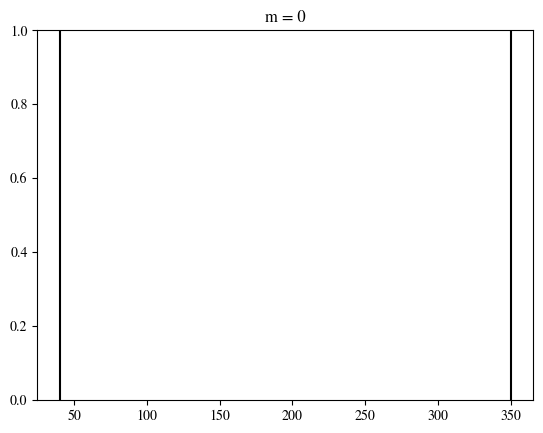

In [59]:
for f in f0:
    plt.axvline(f,color='k')
    plt.title('m = 0')

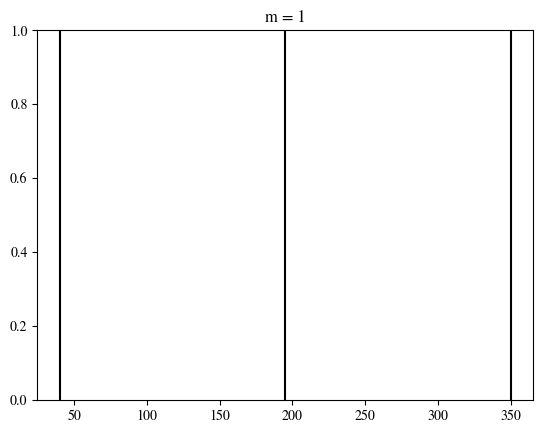

In [60]:
for f in f1:
    plt.axvline(f,color='k')
    plt.title('m = 1')

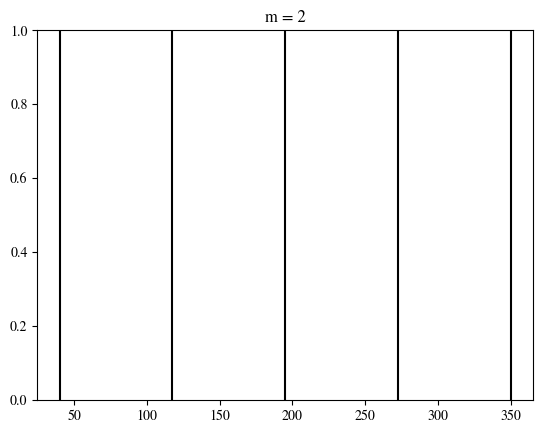

In [61]:
for f in f2:
    plt.axvline(f,color='k')
    plt.title('m = 2')

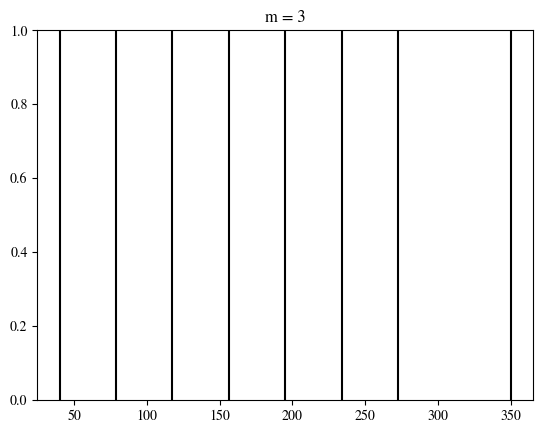

In [62]:
for f in f3:
    plt.axvline(f,color='k')
    plt.title('m = 3')

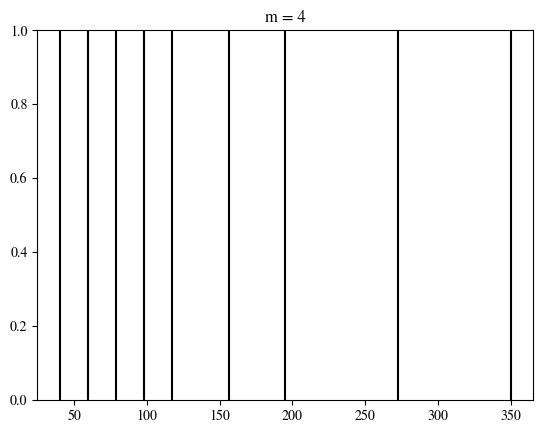

In [63]:
for f in f4:
    plt.axvline(f,color='k')
    plt.title('m = 4')

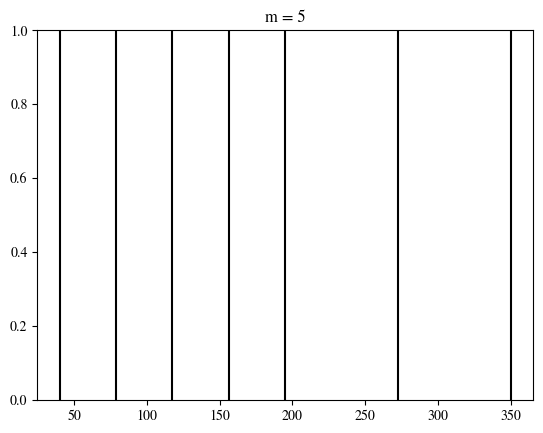

In [64]:
for f in f5:
    plt.axvline(f,color='k')
    plt.title('m = 5')

In [65]:
t0 = thetas(f0,amplitude)
t1 = thetas(f1,amplitude)
t2 = thetas(f2,amplitude)
t3 = thetas(f3,amplitude)
t4 = thetas(f4,amplitude)
t5 = thetas(f5,amplitude)
print(t0,'\n',t1,'\n',t2,'\n',t3,'\n',t4,'\n',t5)

[0.74928181] 
 [0.73045836 0.72835018] 
 [0.71932391 0.73274099 0.74580992 0.75401846] 
 [0.72434959 0.74025722 0.75049365 0.75709133 0.76163211 0.76493255
 0.75401846] 
 [0.74066914 0.75075189 0.75726406 0.76175486 0.75049365 0.75709133
 0.74580992 0.75401846] 
 [0.72434959 0.74025722 0.75049365 0.75709133 0.74580992 0.75401846]


## Scheme 2:

### Only Inspiral

In [66]:
f_start = fmin
f_end = fmax # Set to study only the inspiral
f0 = np.array([f_start,f_end])
f1 = np.array([f_start, (f_start+f_end)/2, f_end])
f2 = np.array([f_start, (f1[0]+f1[1])/2, (f_start+f_end)/2, (f1[1]+f1[2])/2,f_end])
d1 = (f2[-2] - f_start)/6
f3 = np.array([f_start, f_start+d1, f_start+(2*d1), f_start+(3*d1), f_start+(4*d1), f2[-2], f_end])
d2 = (f2[-3] - f_start)/3
d3 = d2/4
d4 = (f2[-3] - f_start)/4
f4 = np.array([f_start, f_start+(d4/2), f_start+d4, f_start+(2*d4), f2[-3], f2[-2], f_end])
#f5 = np.array([f_start, f_start+d4, f_start+(2*d4), f_start+(3*d4), f2[-3], f2[-2], f_end])

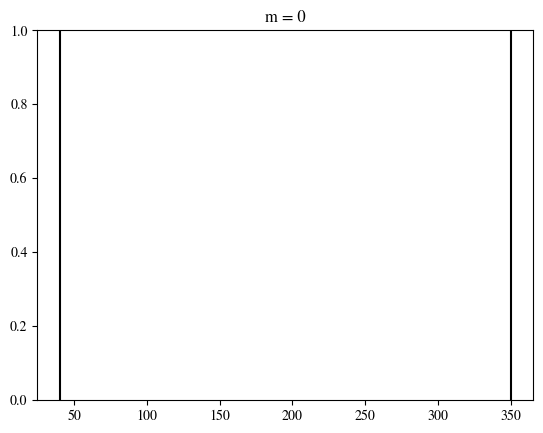

In [67]:
for f in f0:
    plt.axvline(f,color='k')
    plt.title('m = 0')

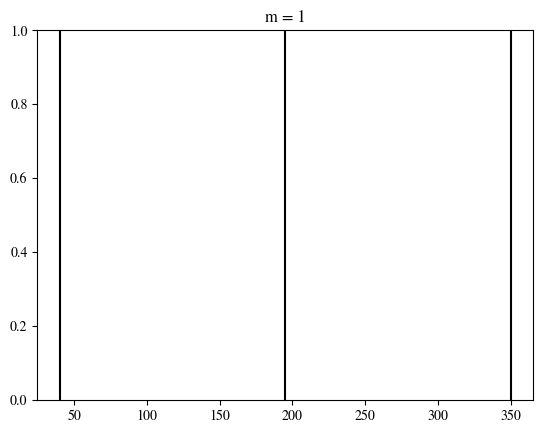

In [68]:
for f in f1:
    plt.axvline(f,color='k')
    plt.title('m = 1')

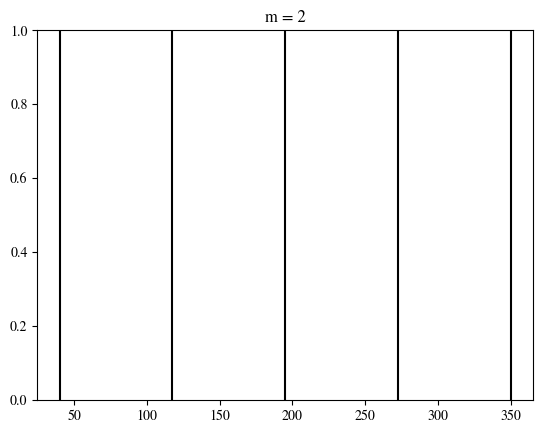

In [69]:
for f in f2:
    plt.axvline(f,color='k')
    plt.title('m = 2')

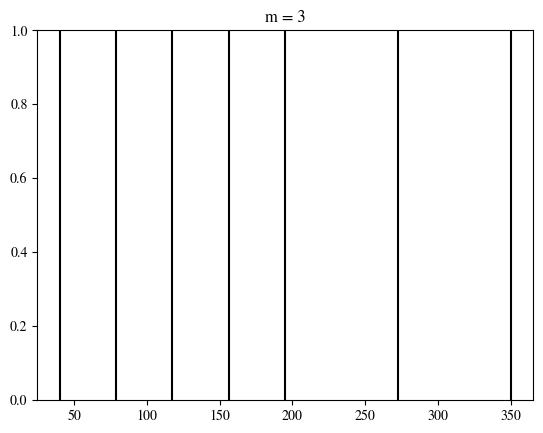

In [70]:
for f in f3:
    plt.axvline(f,color='k')
    plt.title('m = 3')

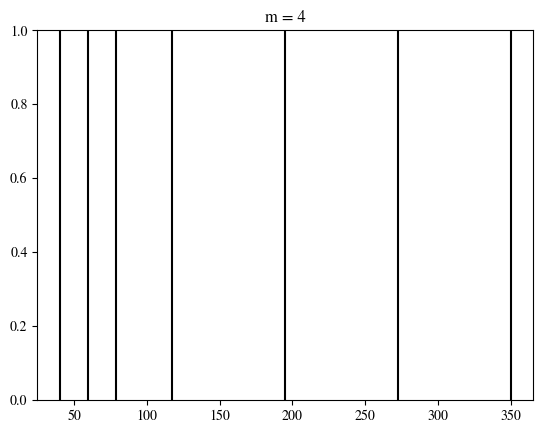

In [71]:
for f in f4:
    plt.axvline(f,color='k')
    plt.title('m = 4')

In [72]:
t0 = thetas(f0,amplitude)
t1 = thetas(f1,amplitude)
t2 = thetas(f2,amplitude)
t3 = thetas(f3,amplitude)
t4 = thetas(f4,amplitude)
#t5 = thetas(f5,amplitude)
print(t0,'\n',t1,'\n',t2,'\n',t3,'\n',t4)

[0.74928181] 
 [0.73045836 0.72835018] 
 [0.71932391 0.73274099 0.74580992 0.75401846] 
 [0.72434959 0.74025722 0.75049365 0.75709133 0.74580992 0.75401846] 
 [0.74066914 0.75075189 0.74025722 0.73274099 0.74580992 0.75401846]


### Full Waveform

In [73]:
f_start = fmin
f_end = fmax # Set to study the entire waveform
f0 = np.array([f_start,f_end])
f1 = np.array([f_start, (f_start+f_end)/2, f_end])
f2 = np.array([f_start, (f1[0]+f1[1])/2, (f_start+f_end)/2, (f1[1]+f1[2])/2,f_end])
d1 = (f2[-2] - f_start)/6
f3 = np.array([f_start, f_start+d1, f_start+(2*d1), f_start+(4*d1), f2[-2], f_end])
d2 = (f2[-3] - f_start)/3
d3 = d2/4
d4 = (f2[-3] - f_start)/4
f4 = np.array([f_start, f_start+(d4/2), f_start+d4, f_start+(2*d4), f2[-3], f2[-2], f_end])
f5 = np.array([f_start, f_start+d4, f_start+(2*d4), f_start+(3*d4), f2[-3], f2[-2], f_end])

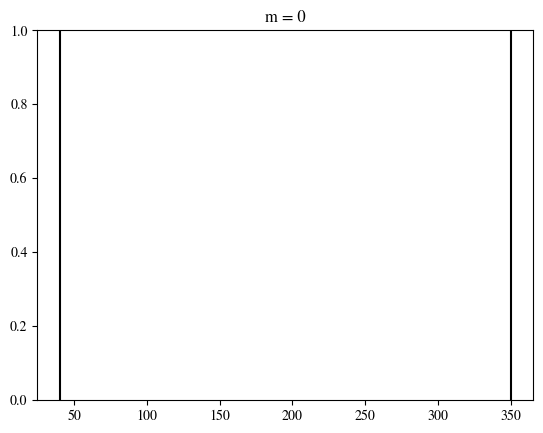

In [74]:
for f in f0:
    plt.axvline(f,color='k')
    plt.title('m = 0')

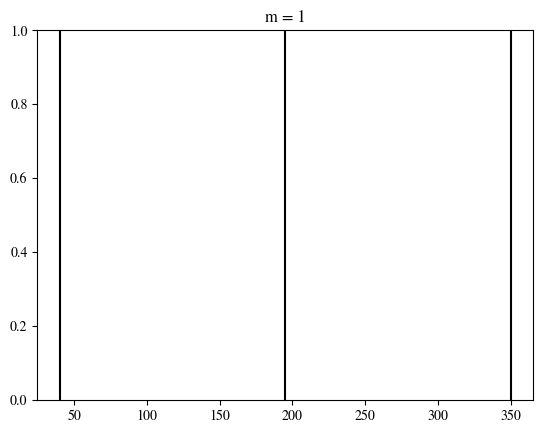

In [75]:
for f in f1:
    plt.axvline(f,color='k')
    plt.title('m = 1')

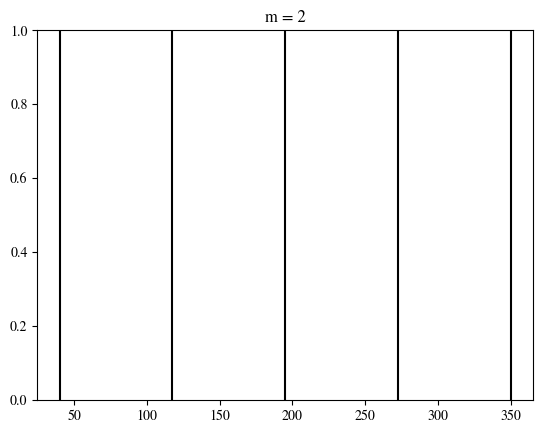

In [76]:
for f in f2:
    plt.axvline(f,color='k')
    plt.title('m = 2')

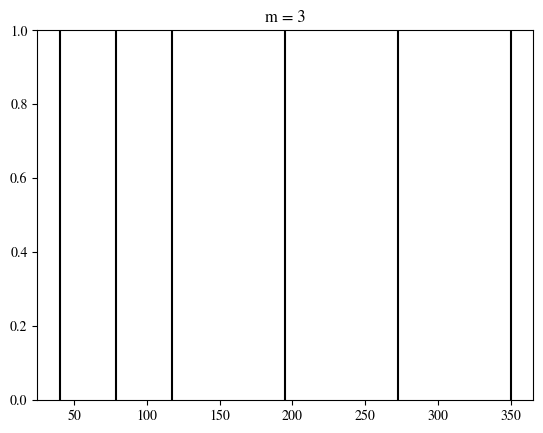

In [77]:
for f in f3:
    plt.axvline(f,color='k')
    plt.title('m = 3')

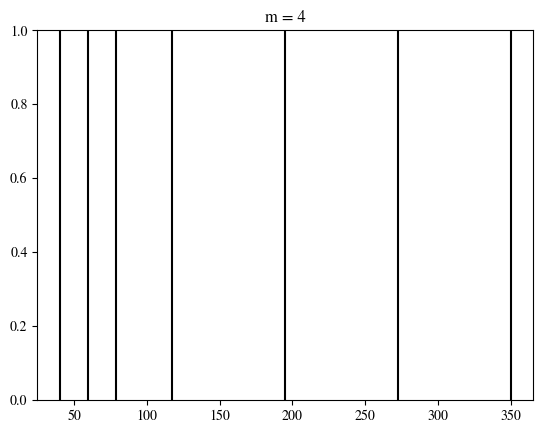

In [78]:
for f in f4:
    plt.axvline(f,color='k')
    plt.title('m = 4')

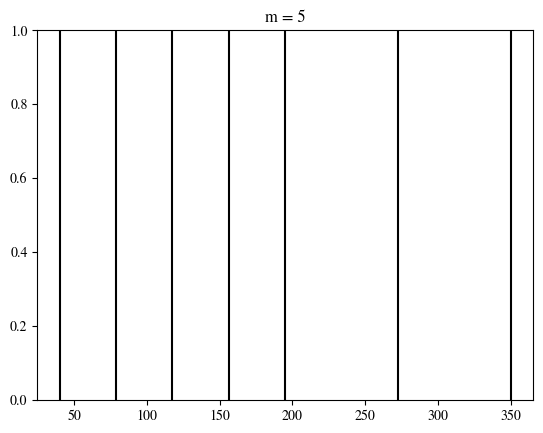

In [79]:
for f in f5:
    plt.axvline(f,color='k')
    plt.title('m = 5')

In [80]:
t0 = thetas(f0,app_amp)
t1 = thetas(f1,app_amp)
t2 = thetas(f2,app_amp)
t3 = thetas(f3,app_amp)
t4 = thetas(f4,app_amp)
t5 = thetas(f5,app_amp)
print(t0,'\n',t1,'\n',t2,'\n',t3,'\n',t4,'\n',t5)

[0.69134909] 
 [0.75468131 0.498768  ] 
 [0.7304692  0.75837712 0.70859427 0.66545498] 
 [0.72251893 0.74890938 0.75837712 0.70859427 0.66545498] 
 [0.73581314 0.74934639 0.74890938 0.75837712 0.70859427 0.66545498] 
 [0.72251893 0.74890938 0.76631502 0.77121723 0.70859427 0.66545498]


# Amplitudes for the inspiral and the full waveform -$2^9$ points

In [81]:
f = np.linspace(fmin,fmax,2**9)
inspiral_amps = amplitude(f) #ONLY INSPIRAL
waveform_amps = am_fun_alt(f) #FULL WAVEFORM - NOT LINEAR SPLINE
approximant_amps = app_amp(f) #LINEAR SPLINE APPROXIMANT FOR FULL WAVEFORM

In [82]:
inspiral_amps

array([0.01351855, 0.01328322, 0.01305538, 0.0128347 , 0.01262085,
       0.01241352, 0.01221243, 0.0120173 , 0.01182789, 0.01164395,
       0.01146525, 0.01129158, 0.01112273, 0.01095851, 0.01079873,
       0.01064323, 0.01049184, 0.0103444 , 0.01020076, 0.01006078,
       0.00992433, 0.00979127, 0.00966149, 0.00953487, 0.0094113 ,
       0.00929066, 0.00917287, 0.00905782, 0.00894543, 0.00883559,
       0.00872824, 0.00862328, 0.00852064, 0.00842025, 0.00832203,
       0.00822592, 0.00813185, 0.00803976, 0.00794959, 0.00786127,
       0.00777477, 0.00769001, 0.00760695, 0.00752555, 0.00744575,
       0.0073675 , 0.00729077, 0.00721551, 0.00714168, 0.00706924,
       0.00699815, 0.00692838, 0.00685989, 0.00679265, 0.00672662,
       0.00666177, 0.00659808, 0.0065355 , 0.00647402, 0.00641361,
       0.00635423, 0.00629587, 0.00623849, 0.00618208, 0.00612661,
       0.00607205, 0.00601839, 0.00596561, 0.00591368, 0.00586258,
       0.00581229, 0.0057628 , 0.00571409, 0.00566614, 0.00561

In [83]:
waveform_amps

array([45.53588379, 44.6209631 , 43.73737627, 42.88365978, 42.05844062,
       41.26042974, 40.48841543, 39.74125681, 39.01787752, 38.31726112,
       37.63844765, 36.98053031, 36.34265222, 35.72400307, 35.12381583,
       34.54136348, 33.97595567, 33.42693547, 32.89367611, 32.37557873,
       31.8720712 , 31.38260719, 30.90666526, 30.44374793, 29.99338072,
       29.55511125, 29.12850831, 28.71316091, 28.30867736, 27.91468436,
       27.53082604, 27.15676306, 26.79217165, 26.4367427 , 26.09018083,
       25.75220346, 25.42253987, 25.1009303 , 24.78712496, 24.48088328,
       24.18197334, 23.89017163, 23.60526283, 23.3270395 , 23.05530184,
       22.78985746, 22.5305211 , 22.27711438, 22.02946554, 21.78740922,
       21.55078613, 21.31944288, 21.09323168, 20.87201007, 20.65564071,
       20.44399109, 20.23693328, 20.03434369, 19.83610281, 19.64209492,
       19.45220797, 19.26633337, 19.08436595, 18.90620385, 18.73174844,
       18.56090423, 18.39357874, 18.22968246, 18.06912872, 17.91

In [84]:
approximant_amps

array([45.53588379, 44.64983261, 43.76378142, 42.88895701, 42.08795705,
       41.28695709, 40.49072517, 39.76895607, 39.04718696, 38.32541786,
       37.66003252, 37.0119356 , 36.36383868, 35.73112659, 35.15141321,
       34.57169982, 33.99198644, 33.43850654, 32.92211887, 32.40573119,
       31.88934352, 31.39074154, 30.93277829, 30.47481503, 30.01685178,
       29.55888853, 29.14698495, 28.7427619 , 28.33853886, 27.93431581,
       27.53152999, 27.17665012, 26.82177025, 26.46689038, 26.11201051,
       25.75713063, 25.43736026, 25.12770407, 24.81804788, 24.5083917 ,
       24.19873551, 23.8912105 , 23.62283539, 23.35446027, 23.08608516,
       22.81771004, 22.54933493, 22.28095981, 22.0422832 , 21.81141378,
       21.58054436, 21.34967494, 21.11880552, 20.8879361 , 20.65706668,
       20.45731511, 20.26039842, 20.06348173, 19.86656504, 19.66964835,
       19.47273166, 19.27581497, 19.08920299, 18.92286613, 18.75652928,
       18.59019242, 18.42385557, 18.25751871, 18.09118185, 17.92

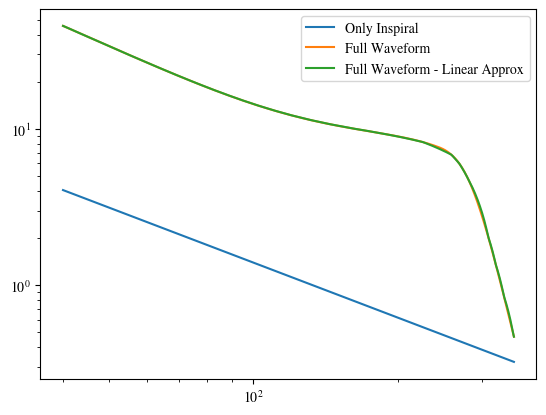

In [85]:
plt.loglog(f,inspiral_amps*300,label='Only Inspiral') #Scaled up by factor 300 just to compare
plt.loglog(f,waveform_amps,label='Full Waveform')
plt.loglog(f,approximant_amps,label='Full Waveform - Linear Approx')
plt.legend()